<a href="https://colab.research.google.com/github/arjunn-13/House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn import metrics



importing the Boston House price

In [2]:
house_price_datasets= sklearn.datasets.load_boston()

LOading Datasets to pandas

In [3]:
house_price_dataframe=pd.DataFrame(house_price_datasets.data,columns=house_price_datasets.feature_names)
print(house_price_dataframe)

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]


Adding price to the list

In [4]:
house_price_dataframe['Price']=house_price_datasets.target
print(house_price_dataframe)

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  Price
0    0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1    0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2    0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3    0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4    0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  273.0     21.0  391.99   9.67   22.4
502  0.04527   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   9.08   20.6
503  0.06076   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   5.64   23.9
504  0.10959   0.0  11.93   0.0  0.573  ...  273.0     21.0  393.45   6.48   22.0
505  0.04741   0.0  11.93   0.0  0.573  ...  273.0     21.0  396.90   7.88   11.9

[506 rows x 14 

Number of rows and columns 

In [5]:
house_price_dataframe.shape

(506, 14)

Checking for missing values

In [6]:
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

Statastical measures  

In [7]:
house_price_dataframe.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the Corelation

In [8]:
corelation = house_price_dataframe.corr()


constructing a heat map

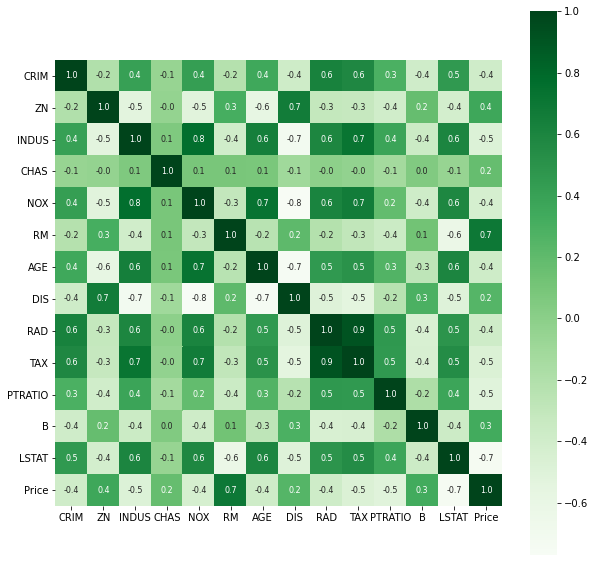

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(corelation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

Splitting the data and target

In [10]:
X=house_price_dataframe.drop(['Price'],axis=1)
Y=house_price_dataframe['Price']


In [11]:
X_Train , X_Test , Y_Train, Y_Test =train_test_split(X,Y,test_size=0.2,random_state=2)

In [12]:
print(X.shape ,X_Train.shape , X_Test.shape)

(506, 13) (404, 13) (102, 13)


Model Training 

XGBoost

In [13]:
model=XGBRFRegressor()
model.fit(X_Train,Y_Train)

[15:36:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
               colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
               max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
               n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=0.8, verbosity=1)

Evaluation

Prediction on training data

In [15]:
training_data_prediction =model.predict(X_Train)
 

In [16]:
Score_1 = metrics.r2_score(Y_Train,training_data_prediction)

#mean absolute  error
Score_2=metrics.mean_absolute_error(Y_Train,training_data_prediction)

print( "R squared error:" , Score_1)
print("Mean Absolute Error", Score_2)


R squared error: 0.821063060730745
Mean Absolute Error 2.640049894257347


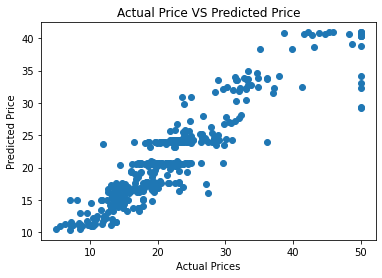

In [17]:
#Visualize actual prices and predicted prices
plt.scatter(Y_Train,training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Price')
plt.title('Actual Price VS Predicted Price')
plt.show()

In [18]:
#Prediction on Test Data
test_data_prediction =model.predict(X_Test)

Score_1 = metrics.r2_score(Y_Test,test_data_prediction)

#mean absolute  error
Score_2=metrics.mean_absolute_error(Y_Test,test_data_prediction)

print( "R squared error:" , Score_1)
print("Mean Absolute Error", Score_2)

R squared error: 0.8517048643795635
Mean Absolute Error 2.8000569960650274
